# Measurements on a single qubit

Quantum mechanics is often said to counterintuitive, in particular when it comes to measurements. This could well be the case if you have only trained your intuition on classical systems. This exersice is a first step towards building up your quantum intuition!

We will work on a single qubit and thereby at the same time familiarize ourseves with the basic building block of quantum computers such as IBM Q.

**Learning goal:** To gain a first expirence with the measurement postulate and start to build up your quantum intuition. Familiarize our selves with the qubit.


# The measurement postulate

Let's keep things simple and work with a two level system, given by the two states $|0\rangle$ and $|1\rangle$. More formally, we have that the two states $|0\rangle$ and $|1\rangle$ are orthonormal and span the Hilbert space. Hence any normalized state $|\psi\rangle$ in this 2d space can be written as a superposition of these two states

\begin{equation}
|\psi\rangle= \alpha|0\rangle+\beta|1\rangle \ ,
\end{equation}

with $|\alpha|^2+|\beta|^2=1$.


In this 2d space the measurement postulate of quantum mechanics states: 

If the system is in the state $|\psi\rangle= \alpha|0\rangle+\beta|1\rangle$ then

**1.** The probability that a measuremet will yield the value $0$ respectively $1$ is given by

\begin{equation}
P_0 = |\langle 0|\psi\rangle|^2 = |\alpha|^2  \quad {\rm and} \quad P_1 = |\langle 1|\psi\rangle|^2 = |\beta|^2
\end{equation}

**2.** If the outcome of the measurement is 0 then the sate of the system right after the measurement is $|0\rangle$ and likevise if the outcome is $1$ the state collapses to $|1\rangle$. 


But what do we measure here? Well, physical observables are given by Hermitian operators and the possible outcomes are the eigenvalues of the given Hermitian operator. Therefore we are measuring an operator, $M$, with eigenvalues $0$ and $1$ and it must be diagonal in the basis given by $|0\rangle$ and $|1\rangle$,  

\begin{equation}
M=\left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array}
\right)
\end{equation}

Why diagonal? Well if the state of the system was $|\psi\rangle = |0\rangle$ and we where to measure $M$ then the outcome would with 100% certainty be 0 and likevise if the state of the system was $|\psi\rangle = |1\rangle$ we would get the value 1. Hence $|0\rangle$ and $|1\rangle$ are eigenstates of the Hermitian operator $M$ and $M$ is diagonal in this basis. 

**Exercise 0:** What does the states $|0\rangle$ and $|1\rangle$ look like in the basis $|0\rangle$ and $|1\rangle$?

**Our first measurement!**

To get started let's simply put the system in the state $|0\rangle$ and then perform a measurement of the Hermitain operator $M$ for which we now know that  

\begin{eqnarray}
M|0\rangle & = & 0|0\rangle \\
M|1\rangle & = & 1|1\rangle 
\end{eqnarray}

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

This is what the system looks like

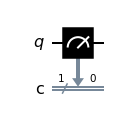

In [2]:
circ = QuantumCircuit(1,1)
circ.measure(0,0)
circ.draw()

**How to read this diagram:** The horizontal line marked by `q` follows our two level system (the qubit). Initially it is (by default) in the state $|0\rangle$. The black box with the gauge on is the measuring device and the arrow below indicates that the outcome of the measurement will be put in the classical bit `c` marked by the horizontal doubleline. The small 0 next to the arrow tells us that it is the zero'th classical bit we use to store the result in. (Later we will have more classical bits and then it will be useful in order to keep track of which measurement is stored in which classical bit.)

**Exercise 1:**  Write down what you expect that the outcome of the measurement will be.

**Exercise 2:** Now run the simulation below, to check if your expectation was correct.

In [3]:
simulator = Aer.get_backend('aer_simulator') #Simulator to run the quantum circuit

result = simulator.run(circ, shots=10, memory=True).result() #Runs the circuit 10 times and saves the results
memory = result.get_memory(circ) #Get the results into an array and print them
print(memory)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


**How to read the result:** We have performed the measurement 10 times and the outcome of each measurement is given in the list.

**This far:** We have put the system in the state $|0\rangle$ and have performed a measuremet of $M$. As $|0\rangle$ is an eigenstate of $M$ the outcome of the measurement is $0$ with 100% certainty.  

**Exercise 3:** What is the state of the system after the measurement?

Now let's apply a rotation by $\pi/2$ around the $y$-axis

\begin{equation}
R_y(\pi/2)=\frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & -1 \\ 1 & 1 \end{array}
\right)
\end{equation}

to the qubit. This will change the state of the system from $|\psi\rangle=|0\rangle$ to 

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big)
\end{equation}



**Exercise 4:** Check that you agree that this is the new state of the system! 

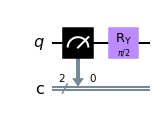

In [4]:
from math import pi
circ = QuantumCircuit(1,2)
circ.measure(0,0)
circ.ry(pi/2,0)
circ.draw()

Let's now measure $M$

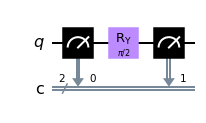

In [5]:
circ.measure(0,1)
circ.draw()

In [6]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '10', '00', '10', '00', '00', '10', '00', '00']


**How to read the result:**  We have performed the full experiment 10 times and thus has 10 sets of resultes, each is given as a as a pair in the output above. Within the pairs the rightmost classical output as before gives 0 with 100% certainty, the result of our second measurement is in the leftmost classical output.

**Exercise 5:** Explain the result above.


Following the second measurement we now choose to measure $M$ once more. 

**Exercise 6:** Write down your expectation for the outcome of the last measurement. Then check your expectation running the quantum system below.

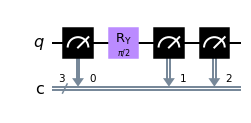

In [7]:
circ = QuantumCircuit(1,3)
circ.measure(0,0)
circ.ry(pi/2,0)
circ.measure(0,1)
circ.measure(0,2)
circ.draw()

In [8]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['000', '000', '000', '110', '000', '110', '000', '110', '000', '110']


**How to read the result:** The result of the new measurement is in the leftmost digit. The two rightmost digits are as before.

**Illustration of the distribution of states by histograms**


This far we have always repeated the simulation 10 times. To check with better statistics we will now run the same experiment 1024 times. Obviously it will be somewhat bothersome to consider 1024 outputs in a long list, so let's instead view it as a histogram.

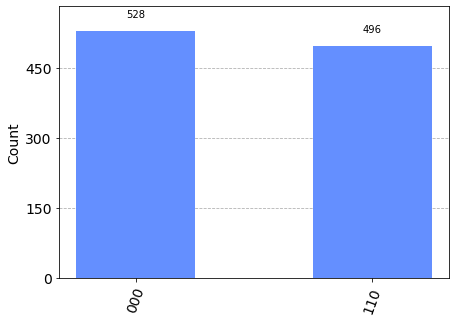

In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(circ)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**Conclusion:** Repeating the measurement has given exactly the same result as before, because the first of the two measurements forced the system in to the eigenstate of $M$ which correspond to the eigenvalue just measured. If we measure $M$ again we therefore get exactly the same result we just had obtained!

**Take home:** After a measurement the state of the system will be the eigenstate associated with the eigenvalue which was the outcome of the measurement!